<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module2/GMM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
from IPython.display import Image
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


# Gaussian Mixture Models
More on clustering

## Gaussian distribution revisited
### Geometry
Probability density function for $\mathcal{N}(\mu, \Sigma)$ with the mean $\mu\in\mathbb{R}^d$ and covariance $\Sigma\in \mathbb{R}^{d\times d}$ where is PD matrix.
$$ p(\mathbf{x}|\mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mu)^\top\Sigma^{-1}(\mathbf{x}-\mu)\right)$$

If $\Sigma = \sigma \mathbb{I}_d $ where $\mathbb{I}_d$ is identity matrix, and $d=2$.

- Each circle is a contour of PDF $p(\mathbf{x}|\mu, \Sigma)$ which is constant value, on which we have euqal probability to generate a point.

- The generated cluster is round shaped.


<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/Gaussian1.png?raw=true" width="300" />
<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/Gaussian2.png?raw=true" width="300" />


For the general $\Sigma$, the interpretation of the contours is?

<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/Gaussian3.png?raw=true" width="300" />
<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/Gaussian4.png?raw=true" width="300" />

For general $\Sigma$,

- square-root of eigenvalues $\lambda_1$ and $\lambda_2$ of covariance $\Sigma$ specify the axis ratio.

- Eigenvectors $u_1, u_2$ specify the rotation of axes.

- The closer $\mathbf{x}$ is to $\mu$, the higher chance/likelihood to generate $\mathbf{x}$.

- the generated cluster is ellipse-like.

### Learning Gaussian distribution

Given samples $\{\mathbf{x}^{(i)}\}_{i=1}^N\subset \mathbb{R}^d$ indepndently drawn from **unknown** Gaussian $\mathcal{N}(\mu, \Sigma)$, how to approximate $\mu$ and $\Sigma$? Maximum likelihood estimation (MLE)!

- The likelihood for generating $\mathbf{x}^{(i)}$:
$$ \ell(\mu, \Sigma; \mathbf{x}^{(i)}):=p(\mathbf{x}^{(i)}|\mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf{x}^{(i)}-\mu)^\top\Sigma^{-1}(\mathbf{x}^{(i)}-\mu)\right)$$

- Define likelihood for the whole sample dataset:
$$\ell(\mu, \Sigma)=\Pi_{i=1}^N p(\mathbf{x}^{(i)}|\mu, \Sigma) $$
  $\ell(\mu, \Sigma)$ measures how likely the sample dataset is generated from $\mathcal{N}(\mu, \Sigma)$.

- Using the fact that
  - The trace is invariant under cyclic permutations of matrix products:
$$ \textrm{tr}(ABC) =\textrm{tr}(CAB) =\textrm{tr}(BCA)  $$

  - Since $\mathbf{x}^\top A \mathbf{x}$ is a scalar, we can take its trace and obtain the same value:
$$\mathbf{x}^\top A \mathbf{x} =\textrm{tr}(\mathbf{x}^\top A \mathbf{x})=\textrm{tr}(\mathbf{x}^\top  \mathbf{x}A) $$

  - $\frac{\partial}{\partial A}\textrm{tr}(AB)=\frac{\partial}{\partial A}\textrm{tr}(BA)=B^\top$

  - $\frac{\partial}{\partial A}\log|A| = A^{-\top} $

  - The determinant of the inverse of an invertible matrix is the inverse of the determinant, $|A|=\frac{1}{|A^{-1}|}$  

- Find the optimal $\mu$ and $\Sigma$ that make the negative log-likelihood minimized $\min_{\mu,\Sigma}-\log\ell(\mu, \Sigma)$:
\begin{align}
\text{NLL}(\mu,\Sigma)&=-\log\ell(\mu, \Sigma)\\
 &= -\sum_{i=1}^N \log(p(\mathbf{x}^{(i)}|\mu, \Sigma)) \\
 &= \frac{Nd}{2}\log(2\pi)-\frac{N}{2}\log(|\Sigma^{-1}|)+\frac{1}{2}\sum_{i=1}^N \left((\mathbf{x}^{(i)}-\mu)^\top \Sigma^{-1}(\mathbf{x}^{(i)}-\mu)\right) \\
&=\frac{Nd}{2}\log(2\pi)-\frac{N}{2}\log(|\Sigma^{-1}|)+\frac{1}{2}\sum_{i=1}^N \textrm{tr}\left((\mathbf{x}^{(i)}-\mu)(\mathbf{x}^{(i)}-\mu)^\top\Sigma^{-1}\right)
\end{align}

- Analytically solve it by setting
$$\frac{\partial \text{NLL}(\mu,\Sigma)}{\partial \mu} =0,\qquad \frac{\partial \text{NLL}(\mu, \Sigma)}{\partial \Sigma^{-1}}=0 $$

Using the fact that
$ \frac{\partial w^\top A w}{\partial w}=2Aw$,
\begin{align}
\frac{\partial \text{NLL}(\mu,\Sigma)}{\partial \mu} =\sum_{i=1}^N \Sigma^{-1}(\mathbf{x}^{(i)}-\mu)=0
\end{align}
Since $\Sigma$ is PD,
the MLE is $\hat{\mu}=\frac{1}{N}\sum_{i=1}^N \mathbf{x}^{(i)}$ which is the sample mean.



Since $\Sigma^\top =\Sigma$,
$$ \frac{\partial\text{NLL}(\mu,\Sigma)}{\partial \Sigma^{-1}} = -\frac{N}{2}\Sigma +\frac{1}{2}\sum_{i=1}^N (\mathbf{x}^{(i)}-\mu) (\mathbf{x}^{(i)}-\mu)^\top$$
Then the MLE is
$$ \hat{\Sigma}= \frac{1}{N}\sum_{i=1}^N (\mathbf{x}^{(i)}-\hat\mu) (\mathbf{x}^{(i)}-\hat\mu)^\top$$

Note MLE is slightly biased since the unbiased one uses $\frac{1}{N-1}$.


In [2]:
# Sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8],
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)

# Sample X from standard normal
n = 5000  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = L.dot(X) + mean
print(Y)

[[-1.59330681  0.01898259  0.79424099 ... -0.88163817 -0.20847727
  -0.88053948]
 [-0.12654057  1.57692939  2.2604892  ... -0.29680415  0.64416449
   0.98284673]]


In [6]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) *
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2)).item()


# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]),
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

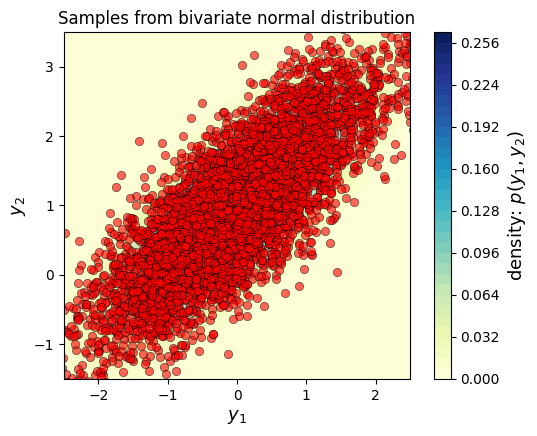

In [7]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()

In [5]:
print('the sample mean vector is\n', Y.mean(1))
print('the sample cov is \n', cov(Y))
relative_error1 = norm(Y.mean(1) -mean)/norm(mean)
relative_error2 = norm(cov(Y)-covariance, 2)/norm(covariance,2)
print(relative_error1)
print(relative_error2)

the sample mean vector is
 [[-0.02475074]
 [ 0.9747407 ]]
the sample cov is 
 [[1.00350017 0.80683949]
 [0.80683949 0.99859132]]
0.03536426548555968
0.004617943964203544


## Gaussian mixture model for clustering
Gaussian mixture model assumes that dataset $\{\mathbf{x}^{(i)}\}_{i=1}^N\subset \mathbb{R}^d$ are independently sampled from $K$ clusters through a generative process:

- for $i$-th data point, generate its cluster membership $z^{(i)}\in \{1, \dots, K\}$ from the multinomial distribution $\pi =(\pi_1, \dots, \pi_K)$ with
$$p(z^{(i)}=c) =\pi_c$$

- Given the Cluster $z^{(i)}=c$, generate a point $\mathbf{x}^{(i)}$ from the associated multivariate Gaussian distribution $\mathcal{N}(\mu_c, \Sigma_c)$ with PDF:
$$p(\mathbf{x}|\mu_c, \Sigma_c)= \frac{1}{\sqrt{(2\pi)^d|\Sigma_c|}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mu_c)^\top\Sigma_c^{-1}(\mathbf{x}-\mu_c)\right)$$

- only the sample $\mathbf{x}^{(i)}$ is observed. Cluster membership $z^{(i)}$ and model parameters $\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^K$ are unknown.

- **Goal:** infer parameters $\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^K$ from the data $\{\mathbf{x}^{(i)}\}_{i=1}^N$ and recover
the clusters, i.e. $\{z^{(i)}\}_{i=1}^N$


### Interpreting the assumptions

- The ratio of number of points in the k clusters is
$\pi_1: \pi_2 : \dots:\pi_K$.

- Points from each cluster are distributed roughly over a ellipsoid centered
at $\mu_1, \dots, \mu_K$. whereas the density of points is determined by the corresponding covariance matrix.

<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/GMM3.png?raw=true" width="400" />

### PDF for Gaussian mixture
We derive the PDF for Gaussian mixture with parameters $\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^K$,

\begin{align}
p(\mathbf{x}|\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^K) &= \sum_{c=1}^K p(\mathbf{x}, z=c|\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^K) \\
&=\sum_{c=1}^K p(z=c|\{\pi_c\}_{c=1}^K) p(\mathbf{x}|z=c,\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^K) \\
&=\sum_{c=1}^K \pi_c p(\mathbf{x}|\mu_c, \Sigma_c)
\end{align}

- $\pi_c$ is the probability to choose the cluster $c$, and $\sum_{c=1}^K \pi_c=1$.

- $p(\mathbf{x}|\mu_c, \Sigma_c)$ is PDF of the $c$-th Gaussian model that generates the point $\mathbf{x}$.

<img src="https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/GMM.png?raw=true" width="500" />



- Contours of Gaussian PDF $p(\mathbf{x}|\mu_c,\Sigma_c)$ for $c=1,2,3$.

- Contour of Gaussian mixture PDF $p(\mathbf{x}|\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^3)$ with $\pi_1=0.5, \pi_2=0.3, \pi_3=0.2$.

- Surface plot of $p(\mathbf{x}|\{\pi_c, \mu_c, \Sigma_c\}_{c=1}^3)$.



### Maximum likelihood estimation for Gaussian mixture

For notational convenience, denote model parameters by $\theta:= \{\pi_c, \mu_c, \Sigma_c\}_{c=1}^K$.

- likelihood for Gaussian mixture generating $\mathbf{x}^{(i)}$ is its PDF $p(\mathbf{x}^{(i)}|\theta)$.

- likelihood for generating data $\{\mathbf{x}^{(i)}\}_{i=1}^N$ is $\ell(\theta) =\Pi_{i=1}^N p(\mathbf{x}^{(i)}|\theta)$.

- Similarly, minimize negative log-likelihood to  find the optimal $\theta$,the model that has the
best chance to generate observation data $\{\mathbf{x}^{(i)}\}_{i=1}^N$, i.e, $\min_{\theta}-\log\ell(\theta)$.

- Unlike in Gaussian model, the MLE problem of Gaussian mixture has NO
analytic solution. Also it is not easy to use gradient method because of $\Sigma$.